In [2]:
!pip install pandas matplotlib

     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.9 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.9 kB 325.1 kB/s eta 0:00:01
     -------------------------------------- 60.9/60.9 kB 460.5 kB/s eta 0:00:00
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     --------------------- ----------------- 92.2/165.9 kB 5.5 MB/s eta 0:00:01
     --------------------- ----------------- 92.2/165.9 kB 5.5 MB/s eta 0:00:01
     -------------------------------------- 165.9/165.9 kB 1.2 MB/s eta 0:00:00
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
    --------------------------------------- 0.2/1

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def process_df(filepath):
    df = pd.read_csv(filepath)
    
    df['current'] = (df['voltage'] - 2.47) / 0.185
    df['power'] = df['current'] * df['voltage']
    
    return df

In [23]:
df0 = process_df("C:/Users/mukiibirogers/OneDrive/Documents/Powermonitoring/data/data.csv") # initial test
df1 = process_df("C:/Users/mukiibirogers/OneDrive/Documents/Powermonitoring/data/data01.csv") # testing again
df2 = process_df("C:/Users/mukiibirogers/OneDrive/Documents/Powermonitoring/data/data02.csv") # running for 9 minutes
df3 = process_df("C:/Users/mukiibirogers/OneDrive/Documents/Powermonitoring/data/data03.csv") # with the current sesnor connected to nothing at its terminals
df4 = process_df("C:/Users/mukiibirogers/OneDrive/Documents/Powermonitoring/data/data04.csv") # With Esp32 connested to batteries
df5 = process_df("C:/Users/mukiibirogers/OneDrive/Documents/Powermonitoring/data/data05.csv") # changing resolution test1
df6 = process_df("C:/Users/mukiibirogers/OneDrive/Documents/Powermonitoring/data/data06.csv") # changing resolution test2

print(f"df0: {df0.shape}, df1: {df1.shape}, df2: {df2.shape}, df3: {df3.shape}, df4: {df4.shape}, df5: {df5.shape}, df6: {df6.shape}")

df0: (336, 4), df1: (182, 4), df2: (10585, 4), df3: (1783, 4), df4: (2468, 4), df5: (1336, 4), df6: (1593, 4)


In [6]:
df2.head()

,time,voltage,current,power
0,1719683317500671000,1.126537,-7.261962,-8.180869
1,1719683317505016000,1.153930,-7.113892,-8.208933
2,1719683317509461000,1.116869,-7.314222,-8.169027
3,1719683317513771000,1.107201,-7.366481,-8.156175
4,1719683317565958000,1.103978,-7.383903,-8.151666


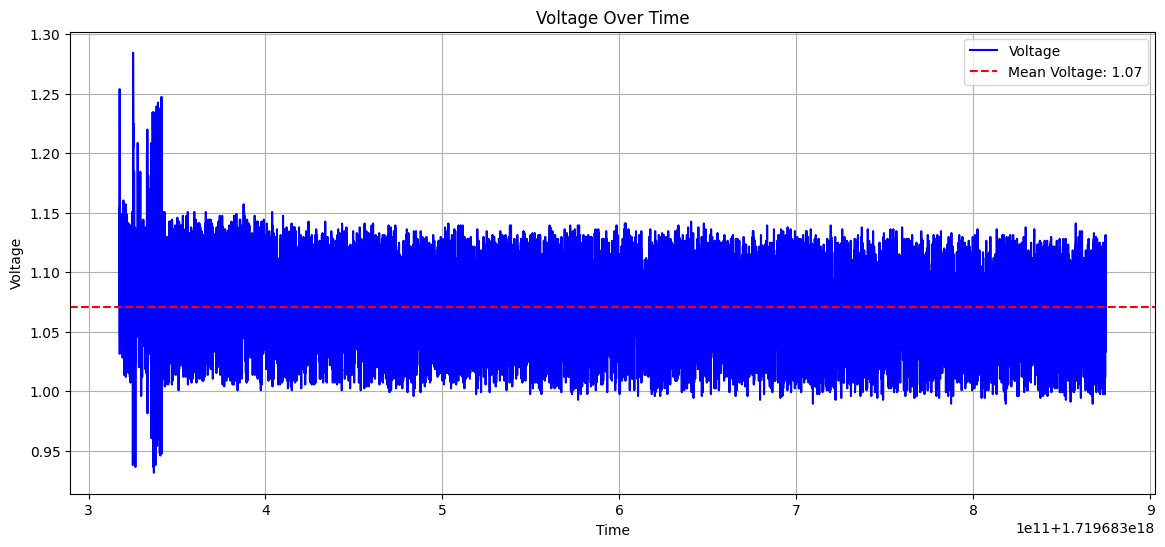

In [7]:
import matplotlib.pyplot as plt

mean_voltage = df2['voltage'].mean()
# Plotting
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df2["time"], df2["voltage"], label='Voltage', color='blue', linestyle='-')
ax.axhline(y=df2['voltage'].mean(),color='red', linestyle='--', linewidth=1.5, label=f'Mean Voltage: {mean_voltage:.2f}' )
# Add labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Voltage')
ax.set_title('Voltage Over Time')

# Enable grid
ax.grid(True)

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [8]:
def plot_voltage_over_time(df, time_col, voltage_col):
    """
    Plots voltage over time and adds a mean voltage line.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    time_col (str): The name of the time column.
    voltage_col (str): The name of the voltage column.
    """
    # Calculate the mean voltage
    mean_voltage = df[voltage_col].mean()
    

    # Plotting
    ax = plt.subplots(figsize=(14, 6))
    ax.plot(df[time_col], df[voltage_col], label='Voltage', color='blue', linestyle='-')

    # Add labels and title
    ax.set_xlabel('Time')
    ax.set_ylabel('Voltage')
    ax.set_title('Voltage Over Time')

    # Add a horizontal line for the mean voltage
    ax.axhline(y=mean_voltage, color='red', linestyle='--', linewidth=1.5, label=f'Mean Voltage: {mean_voltage:.2f}')
    
    # Add a legend
    ax.legend()

    # Show the plot
    plt.show()

In [9]:
def plot_variables(df, time_col, var2):
    
    mean_var2 = df[var2].mean()
    
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.plot(df[time_col], df[var2], label=var2, color='blue')
    
    ax.set_xlabel(time_col)
    ax.set_ylabel(var2)
    ax.set_title(f'{var2} against {time_col}')
    
    ax.axhline(y=mean_var2, color='red', linestyle='--', linewidth=1.5, label=f'Mean {var2}: {mean_var2:.2f}')
    
    ax.legend()
    plt.show()

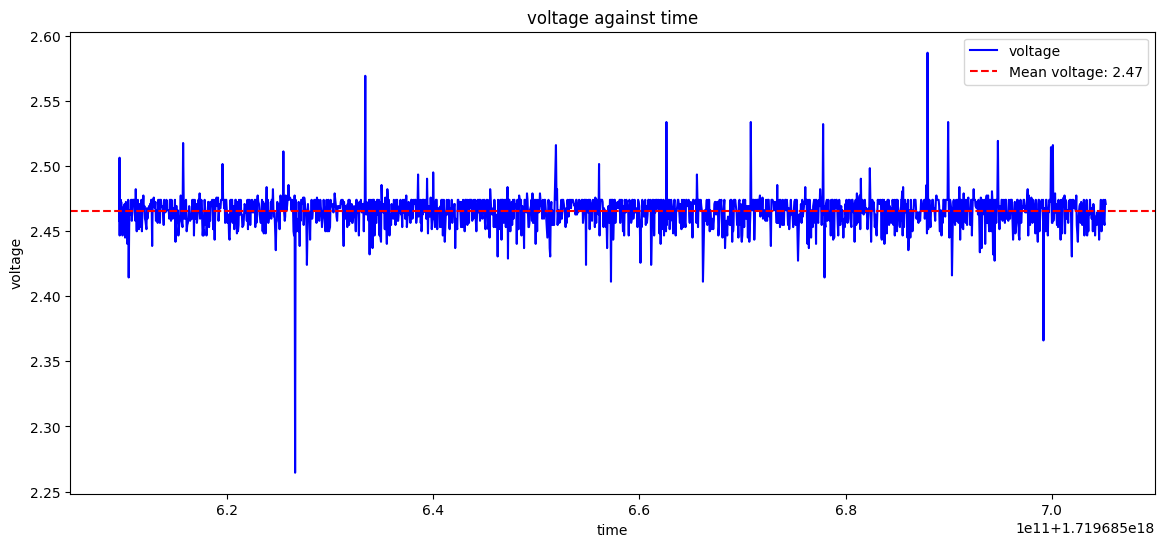

In [10]:
plot_variables(df3, 'time', 'voltage')

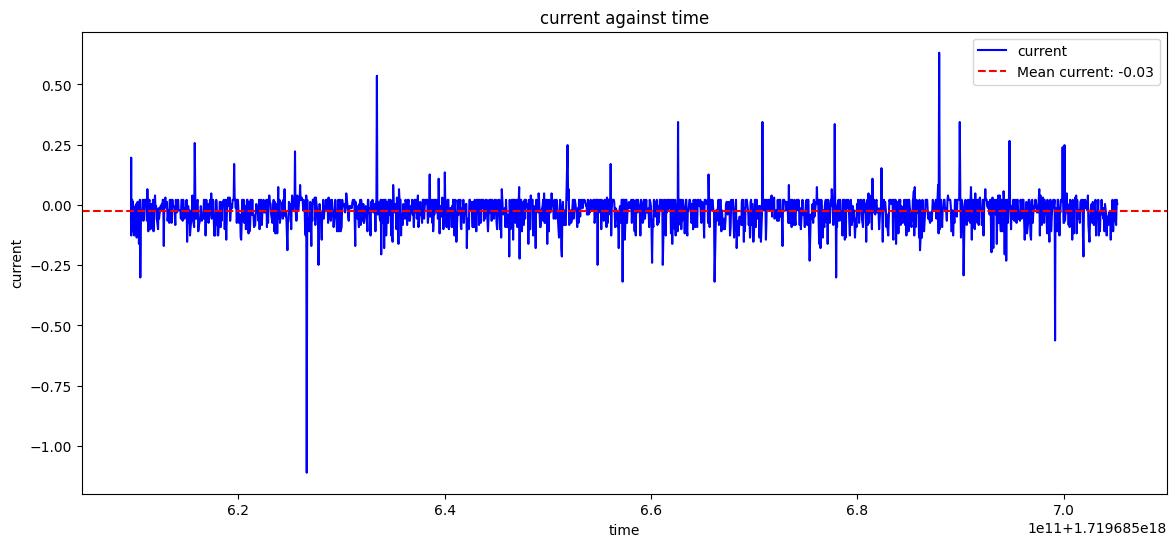

In [11]:
plot_variables(df3, 'time', 'current')

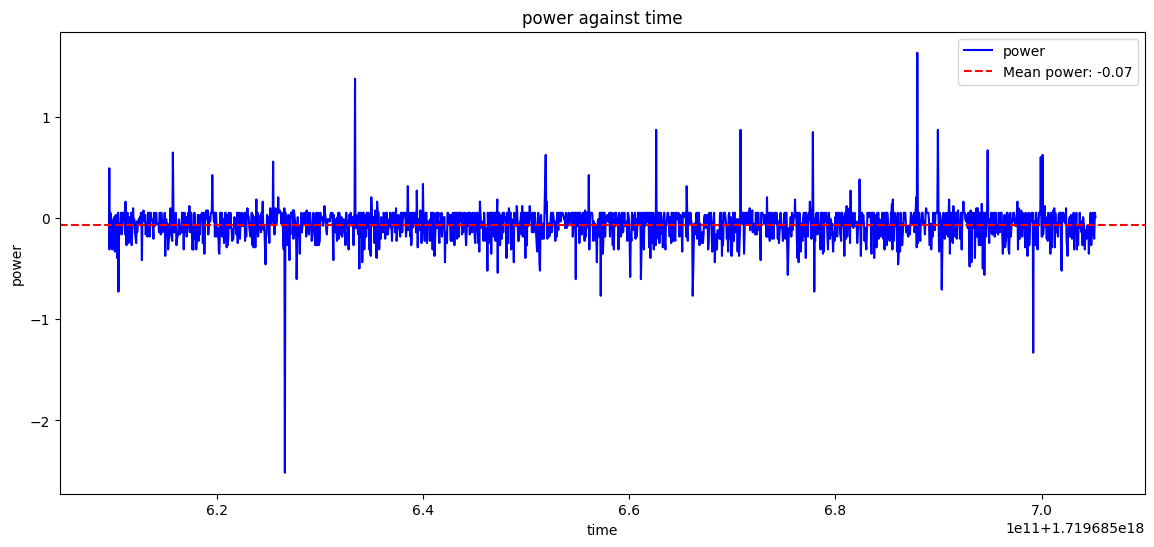

In [12]:
plot_variables(df3, 'time', 'power')

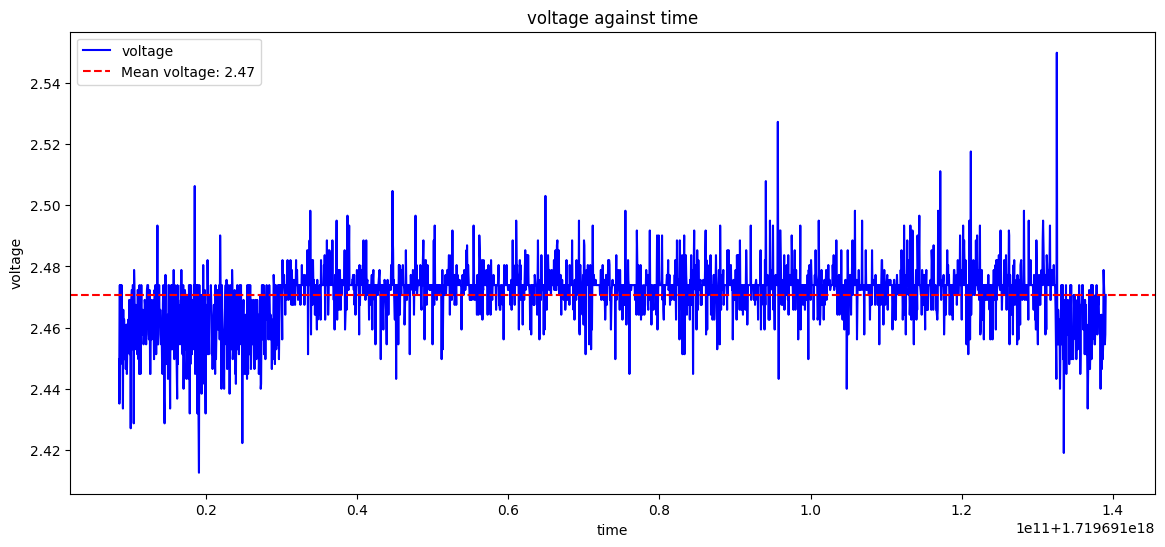

In [13]:
plot_variables(df4, 'time', 'voltage')

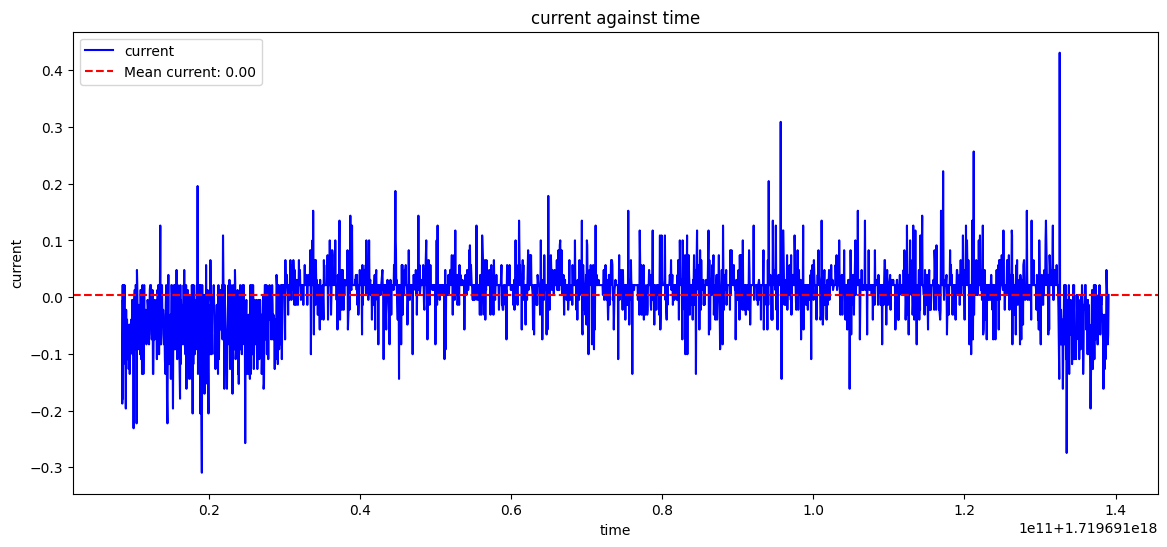

In [14]:
plot_variables(df4, 'time', 'current')

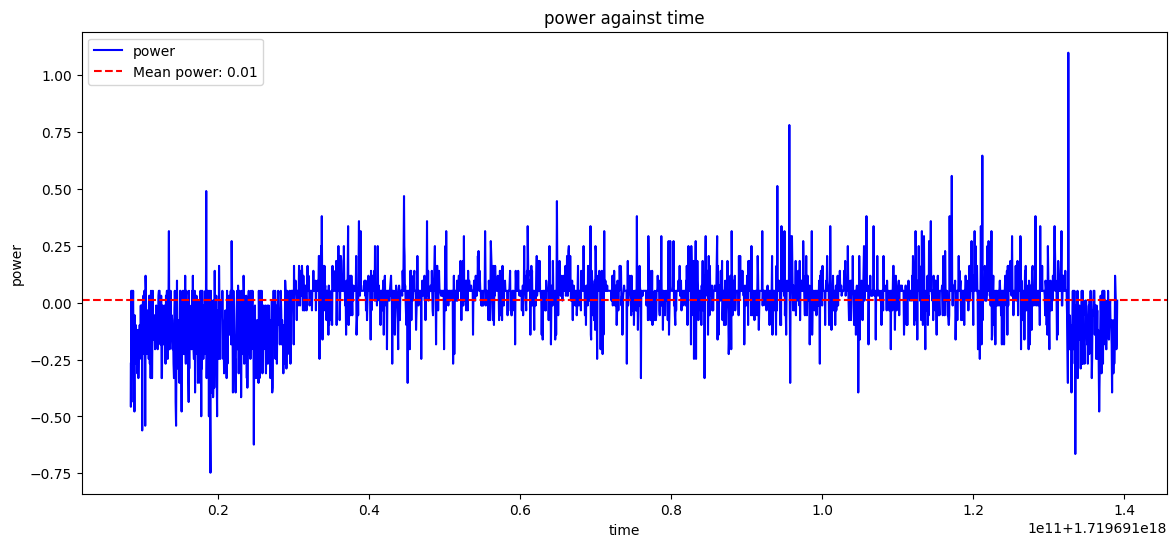

In [15]:
plot_variables(df4, 'time', 'power')

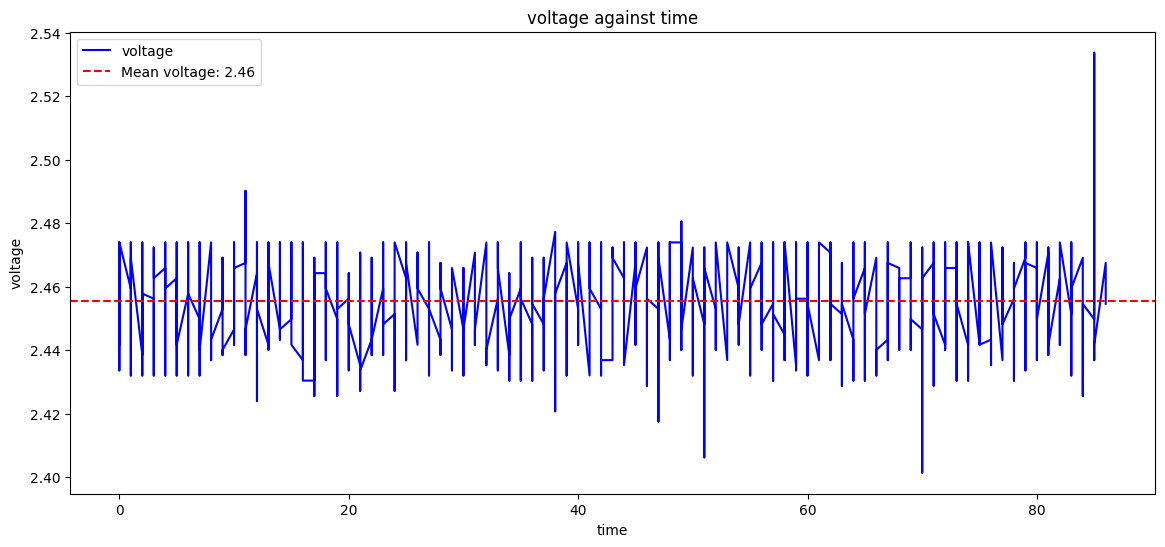

In [24]:
plot_variables(df6, 'time', 'voltage')

In [21]:
df5.head()

,time,voltage,current,power
0,0,2.464262,-0.031016,-0.076432
1,0,2.443314,-0.144249,-0.352445
2,0,2.456205,-0.074568,-0.183153
3,0,2.473930,0.021243,0.052554
4,0,2.441703,-0.152957,-0.373475


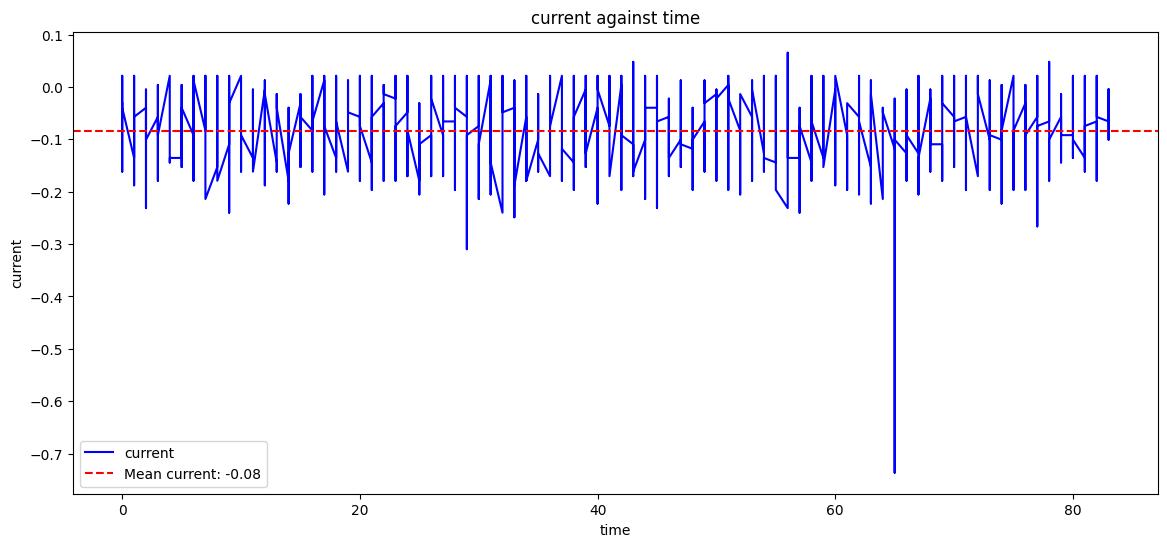

In [22]:
plot_variables(df5, 'time', 'current')

In [26]:
df6 = pd.read_csv("C:/Users/mukiibirogers/OneDrive/Documents/Powermonitoring/data/data06.csv")
df6.head(20)

,time,voltage,average_voltage
0,0,2.446537,2.446537
1,0,2.462651,2.454594
2,0,2.456205,2.455131
3,0,2.440091,2.451371
4,0,2.436869,2.448471
5,0,2.454594,2.449491
6,0,2.452982,2.449990
7,0,2.446537,2.449558
8,0,2.446537,2.449223
9,0,2.451371,2.449437


In [28]:
df7 = pd.read_csv("C:/Users/mukiibirogers/OneDrive/Documents/Powermonitoring/data/data07.csv")
df7.head(20)

,time,voltage,average_voltage
0,0,2.440091,2.440091
1,0,2.457816,2.448954
2,0,2.449760,2.449223
3,0,2.469096,2.454191
4,0,2.446537,2.452660
5,0,2.454594,2.452982
6,0,2.462651,2.454364
7,0,2.454594,2.454392
8,0,2.456205,2.454594
9,0,2.469096,2.456044


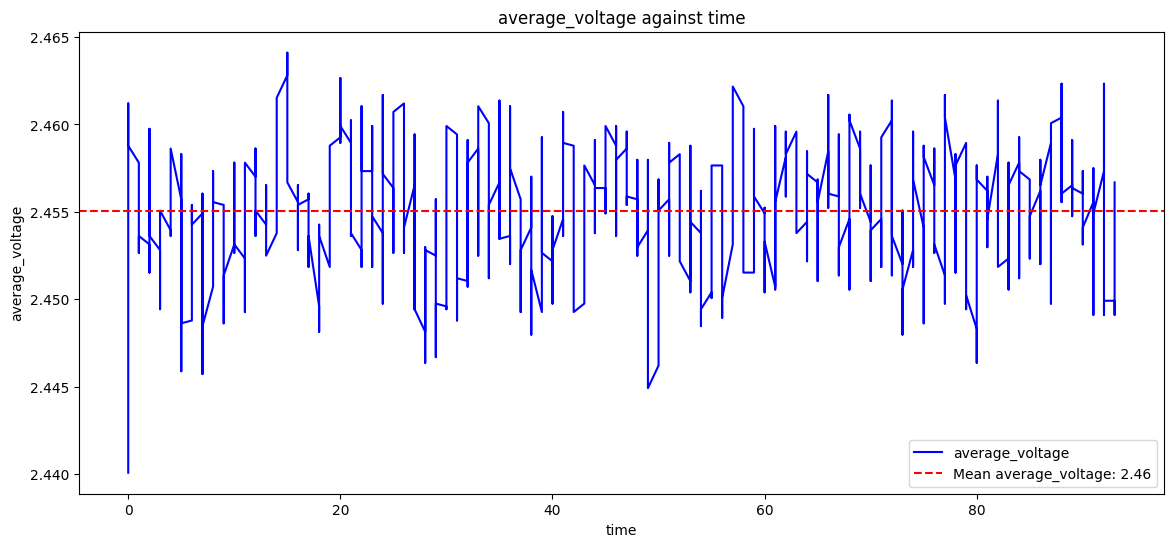

In [29]:
plot_variables(df7, 'time', 'average_voltage')

In [30]:
df8 = pd.read_csv("C:/Users/mukiibirogers/OneDrive/Documents/Powermonitoring/data/data08.csv")
df8.head(20)

,time,voltage,average_voltage
0,2969000,2.473930,2.473930
1,8005000,2.462651,2.468290
2,12921000,2.438480,2.458354
3,17963000,2.444926,2.454997
4,23335000,2.452982,2.454594
5,28792000,2.464262,2.456205
6,34375000,2.473930,2.458737
7,40189000,2.472318,2.460435
8,46488000,2.469096,2.461397
9,52716000,2.469096,2.462167


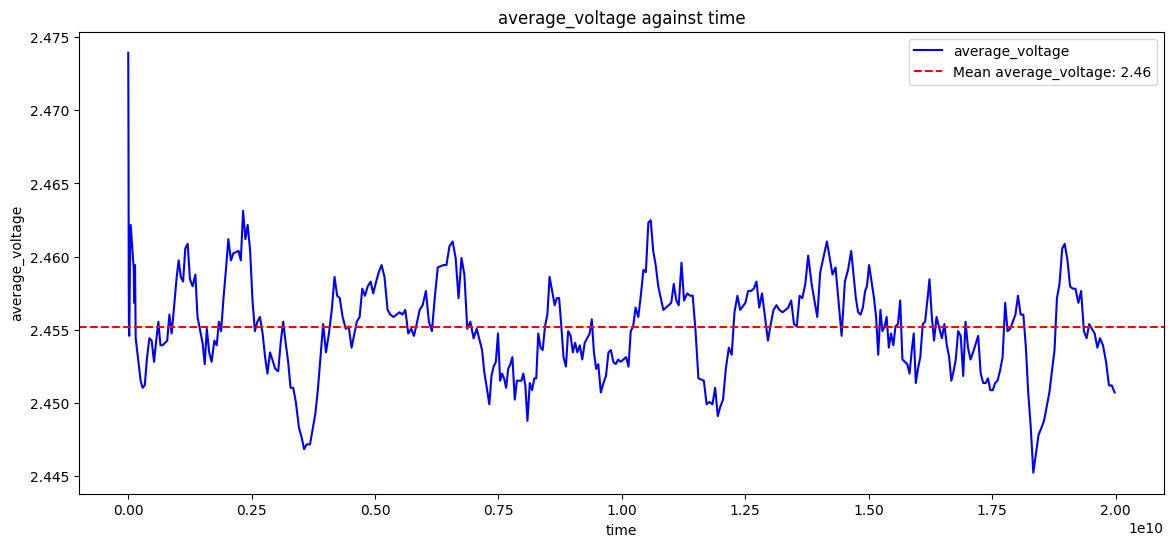

In [31]:
plot_variables(df8, 'time', 'average_voltage')

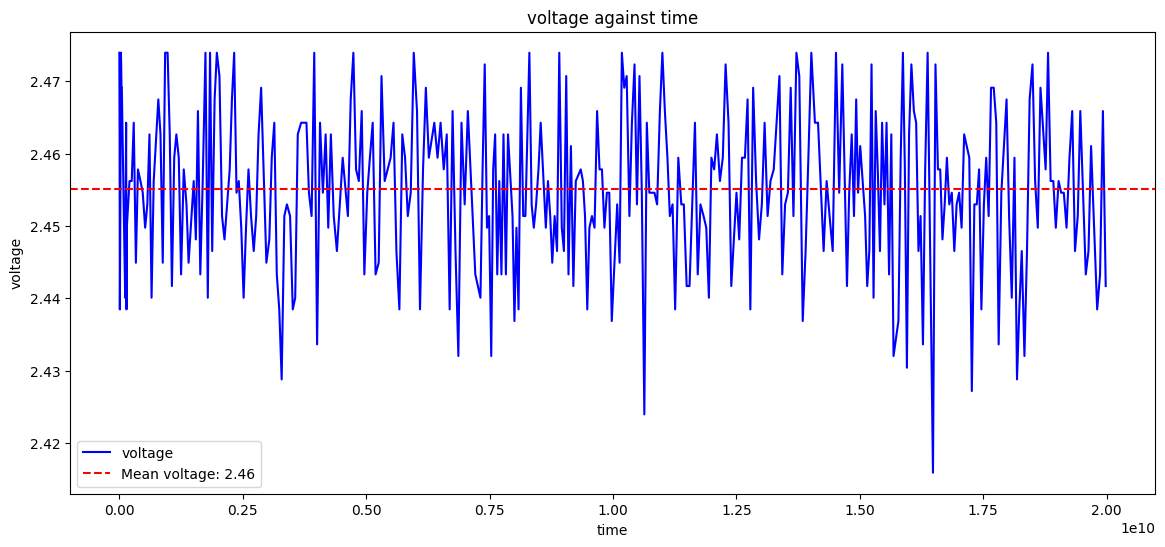

In [32]:
plot_variables(df8, 'time', 'voltage')